In [ ]:
%matplotlib inline

import urllib.request
from bs4 import BeautifulSoup
from collections import namedtuple
import datetime
import pickle


import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def GetCount(page, header):
    results = page.find(id=header).parent.next_sibling.next_sibling.find_all("li")
    return len(results)

def GetCountsForDayOfYear(date):
    url = "https://en.wikipedia.org/wiki/" + date.strftime("%B_%d")
    page = BeautifulSoup(urllib.request.urlopen(url).read(), 'html.parser')
    headers = ["Events", "Births", "Deaths"]
    return namedtuple("counts", headers)(*[GetCount(page, h) for h in headers])

In [ ]:
d = datetime.date(2016,1,1)
delta = datetime.timedelta(days=1)
year_summary = {} # empty dictionary
while True:
    year_summary[d] = GetCountsForDayOfYear(d)
    d = d + delta
    if d.day + d.month == 2:
        break

# Fix the Feb 29th births entries
url = "https://en.wikipedia.org/wiki/" + datetime.date(2016,2,29).strftime("%B_%d")
page = BeautifulSoup(urllib.request.urlopen(url).read(), 'html.parser')
feb_29_births = len(page.find(id="Notable_29_February_births").parent.next_sibling.next_sibling.next_sibling.next_sibling.find_all("li"))
bad_29 = year_summary[datetime.date(2016,2,29)]
fixed_29 = namedtuple("counts", "Events Births Deaths")(bad_29.Events, feb_29_births, bad_29.Deaths)
year_summary[datetime.date(2016,2,29)] = fixed_29

# Convert the dictionary of tuples into a dataframe, transpose it, and save it to csv.
df = pd.DataFrame(year_summary).transpose()
df.columns=['Events', 'Births', 'Deaths']
df.to_csv("data.csv")
df

,events,births,deaths
2016-01-01,121,298,104
2016-01-02,38,193,83
2016-01-03,46,191,108
2016-01-04,41,163,105
2016-01-05,35,165,79
2016-01-06,47,239,101
2016-01-07,41,198,108
2016-01-08,49,231,115
2016-01-09,48,206,111
2016-01-10,35,227,126


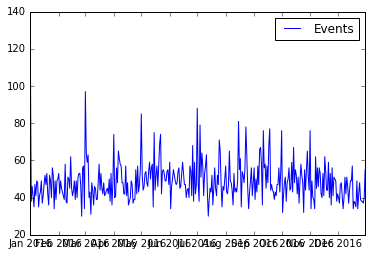

In [ ]:
df.plot(y="Events")

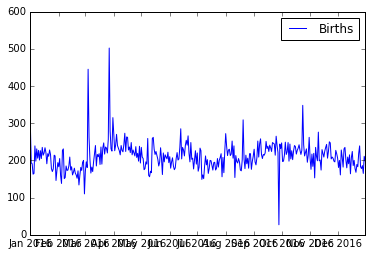

In [ ]:
df.plot(y="Births")

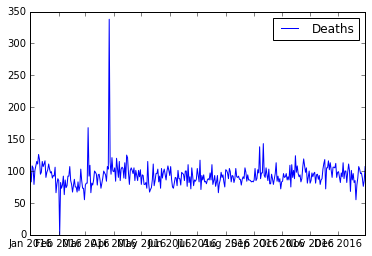

In [ ]:
df.plot(y="Deaths")